# Assignment 3: Clustering

Szymon Siemieniuk 151947

Nikita Makarevich 153989

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import GridSearchCV


df_data = pd.read_csv('data/data.csv')

In [2]:
df_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
cat_features = [
    'f_07',
    'f_08',
    'f_09',
    'f_10',
    'f_11',
    'f_12',
    'f_13'
]
df_cat = df_data[cat_features]

num_features = list(set(df_data.columns) - set(cat_features) - set('id'))
df_num = df_data[num_features]

columns = num_features
columns.extend(cat_features)

df_data = df_data[columns]

In [4]:
scaler = MinMaxScaler().fit(df_num)
norm = Normalizer().fit(df_cat)

df_scaled = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)

df_scaled[df_cat.columns] = norm.transform(df_cat)

df_scaled.drop(columns=['id'], inplace=True)

In [5]:
df_scaled.head()

,f_25,f_15,f_17,f_16,f_28,f_05,f_02,f_27,f_06,f_18,...,f_26,f_03,f_04,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,0.546854,0.555722,0.449354,0.629554,0.557570,0.558689,0.562361,0.605064,0.804339,0.426951,...,0.603894,0.546940,0.431504,0.079368,0.515889,0.555573,0.198419,0.515889,0.238103,0.238103
1,0.446892,0.469987,0.510143,0.518967,0.306763,0.573136,0.562946,0.543135,0.540179,0.521541,...,0.453613,0.595238,0.335748,0.095564,0.143346,0.286691,0.191127,0.286691,0.764510,0.430037
2,0.397413,0.568349,0.480574,0.543429,0.238558,0.564273,0.358769,0.428078,0.773949,0.501259,...,0.605750,0.402646,0.540544,0.236757,0.520865,0.236757,0.378811,0.426162,0.142054,0.520865
3,0.331975,0.586226,0.338765,0.372635,0.516282,0.341746,0.519301,0.500973,0.565985,0.338474,...,0.469007,0.504429,0.576596,0.297775,0.099258,0.645179,0.397033,0.446663,0.297775,0.198517
4,0.392484,0.445157,0.564735,0.373856,0.356527,0.271661,0.459521,0.476586,0.638294,0.516706,...,0.624310,0.259276,0.494476,0.382255,0.334473,0.238909,0.143346,0.047782,0.621164,0.525600


In [8]:
RANDOM_STATE = 420
SAMPLE_SIZE = 10000

silhouette_scores = []
bouldin_scores = []
ns_clusters = list(range(2, 13, 1))

for n_clusters in ns_clusters:
    print(f"Computing for n_clusters: {n_clusters}")
    indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
    sampled_df_scaled = df_scaled.iloc[indices]

    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto", verbose=False)
    kmeans.fit(sampled_df_scaled)

    labels = kmeans.predict(sampled_df_scaled)
    silhouette_scores.append(silhouette_score(sampled_df_scaled, labels))
    bouldin_scores.append(davies_bouldin_score(sampled_df_scaled, labels))


Computing for n_clusters: 2
Computing for n_clusters: 3
Computing for n_clusters: 4
Computing for n_clusters: 5
Computing for n_clusters: 6
Computing for n_clusters: 7
Computing for n_clusters: 8
Computing for n_clusters: 9
Computing for n_clusters: 10
Computing for n_clusters: 11
Computing for n_clusters: 12


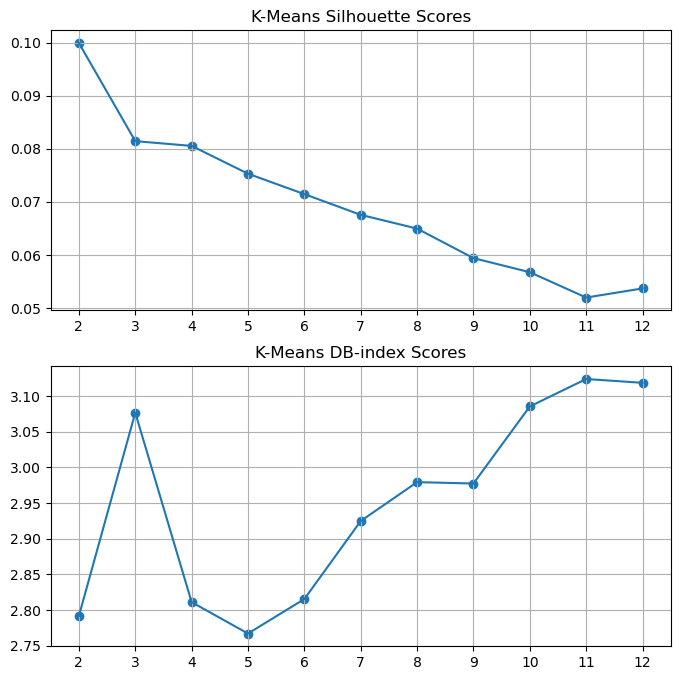

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(ns_clusters, silhouette_scores)
axs[0].scatter(ns_clusters, silhouette_scores)
axs[0].set_title("K-Means Silhouette Scores")
axs[0].set_xticks(ns_clusters)
axs[0].grid()

axs[1].plot(ns_clusters, bouldin_scores)
axs[1].scatter(ns_clusters, bouldin_scores)
axs[1].set_title("K-Means DB-index Scores")
axs[1].set_xticks(ns_clusters)
axs[1].grid()

plt.show()

In [10]:
N_TRIALS = 10000
dists = []
for _ in range(N_TRIALS):
    inds = sample_without_replacement(len(df_scaled), 2)
    dist = np.linalg.norm(df_scaled.iloc[inds[0]] - df_scaled.iloc[inds[1]])
    dists.append(dist)

In [11]:
np.mean(dists)

1.0102681059410688

In [62]:
def dbscan_grid(epsilons, mins_samples, scorer=davies_bouldin_score):
    results = np.zeros(shape=(len(epsilons), len(mins_samples)))
    for i, eps in enumerate(epsilons):
        for j, min_samples in enumerate(mins_samples):
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(df_scaled)
            results[i, j] = scorer(df_scaled, labels)
    return results

epsilons = np.linspace(0.45, 0.45667, 5)
mins_samples = np.arange(2, 8)
dbscan_bouldin_scores = []

results = dbscan_grid(epsilons, mins_samples, scorer=davies_bouldin_score)

<Axes: >

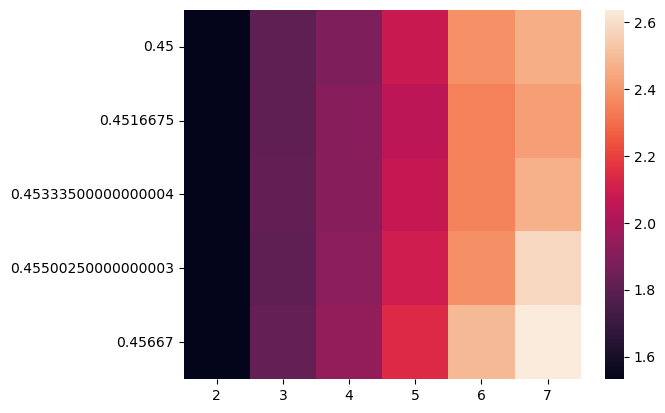

In [63]:
sns.heatmap(results, xticklabels=mins_samples, yticklabels=epsilons)

In [53]:
dbscan = DBSCAN(eps=epsilons[3], min_samples=5)
labels = dbscan.fit_predict(df_scaled)

label_ids, label_counts = np.unique(labels, return_counts=True)
dbscan_results = pd.DataFrame()
dbscan_results["Label"] = label_ids
dbscan_results["Counts"] = label_counts

dbscan_results

,Label,Counts
0,-1,75040
1,0,22354
2,1,3
3,2,3
4,3,2
...,...,...
145,144,5
146,145,4
147,146,4
148,147,5
